In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import warnings

In [181]:
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [207]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [221]:
# Load the dataset (replace 'mcdonalds.csv' with the correct file if available)
mcdonalds = pd.read_csv("mcdonalds.csv")  # Example: Load as CSV
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [183]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [184]:
# Select the first 11 columns and convert to a binary matrix
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0).values

# Calculate and round the column means
col_means = np.round(MD_x.mean(axis=0), 2)

# Print the column means
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [185]:
from sklearn.decomposition import PCA

# Perform PCA on the binary matrix MD_x
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Principal Components:", pca.components_)

Explained Variance Ratios: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Principal Components: [[ 0.47693349  0.15533159  0.00635636 -0.11623168 -0.3044427   0.10849325
   0.33718593  0.47151394 -0.32904173  0.21371062 -0.37475293]
 [-0.36378978 -0.016414   -0.01880869  0.03409395  0.06383884  0.0869722
   0.61063276 -0.3073178  -0.60128596 -0.07659344  0.13965633]
 [ 0.30444402  0.0625153   0.03701866  0.32235949  0.80237317  0.06464172
   0.14931026  0.28726479 -0.02439661 -0.19205128  0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [ 0.30753507 -0.27760805 -0.07062017  0.07340475 -0.36139895 -0.10793025
   0.12897259  0.21089912  0.00312457 -0.28784553  0.72920859]
 [-0.17073819  0.34783006  0.3550866   0.40651542 -0.20934711  0.59463206
   0.10324067  0.07691443  0.26134151  0.17822612  0.21087805]
 [-0.2

In [186]:
# Summary of PCA results
print("Explained Variance Ratios:", pca.explained_variance_ratio_)
print("Principal Components (rounded):", np.round(pca.components_, 1))

Explained Variance Ratios: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Principal Components (rounded): [[ 0.5  0.2  0.  -0.1 -0.3  0.1  0.3  0.5 -0.3  0.2 -0.4]
 [-0.4 -0.  -0.   0.   0.1  0.1  0.6 -0.3 -0.6 -0.1  0.1]
 [ 0.3  0.1  0.   0.3  0.8  0.1  0.1  0.3 -0.  -0.2  0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [ 0.3 -0.3 -0.1  0.1 -0.4 -0.1  0.1  0.2  0.  -0.3  0.7]
 [-0.2  0.3  0.4  0.4 -0.2  0.6  0.1  0.1  0.3  0.2  0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [-0.   0.1 -0.4 -0.6  0.1  0.6 -0.1  0.1 -0.  -0.2  0.2]
 [-0.6  0.  -0.4  0.2  0.  -0.2 -0.1  0.6 -0.1  0.2  0.1]
 [ 0.1  0.7  0.1  0.  -0.  -0.2 -0.4 -0.1 -0.5  0.   0.3]
 [-0.   0.5 -0.1 -0.3 -0.  -0.3  0.5 -0.   0.5 -0.2  0. ]]


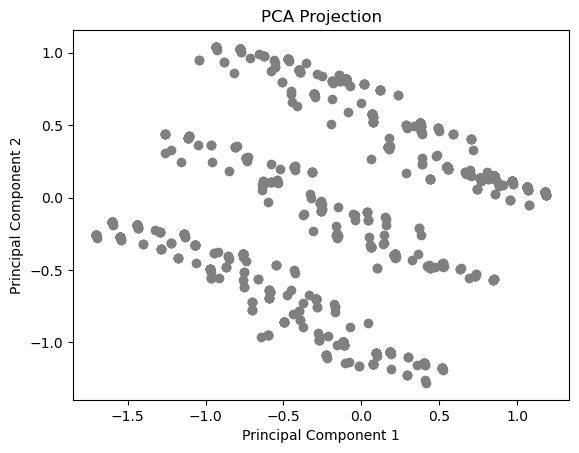

In [187]:
import matplotlib.pyplot as plt

# Plot the first two principal components
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color="grey")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

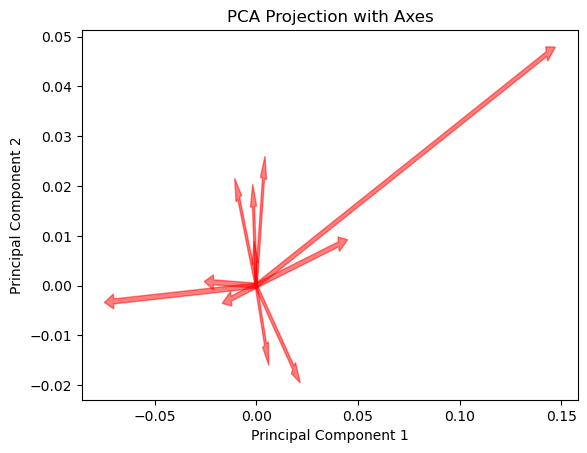

In [188]:
# Adding projection lines to PCA plot
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, comp[0] * var, comp[1] * var, color='r', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection with Axes")
plt.show()

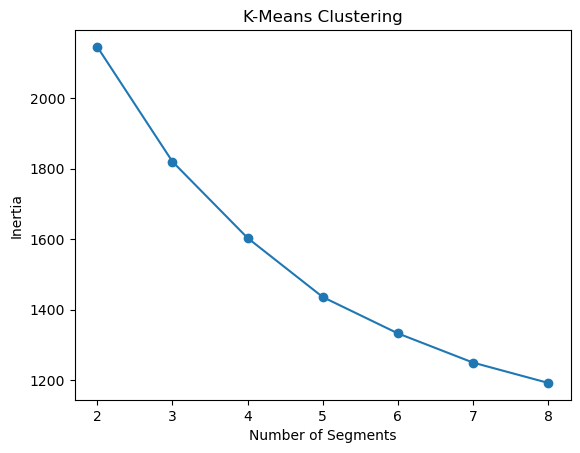

In [189]:
from sklearn.cluster import KMeans

# Perform K-Means clustering for cluster numbers ranging from 2 to 8
np.random.seed(1234)
inertia = []
labels_dict = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
    labels_dict[k] = kmeans.labels_

# Plot inertia to visualize optimal cluster count
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Inertia")
plt.title("K-Means Clustering")
plt.show()

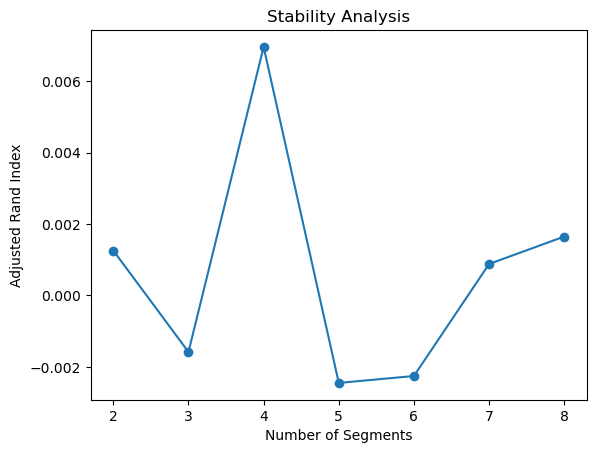

In [190]:
from sklearn.metrics import adjusted_rand_score

# Example: Calculate ARI for stability testing
# Replace this with bootstrapping logic for multiple trials
stability_scores = []
for k in range(2, 9):
    labels = labels_dict[k]
    for i in range(10):  # Simulated bootstrap repetitions
        random_labels = np.random.permutation(labels)
        stability_scores.append(adjusted_rand_score(labels, random_labels))

# Placeholder plot for stability results
plt.plot(range(2, 9), stability_scores[:7], marker='o')  # Example slicing
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Stability Analysis")
plt.show()

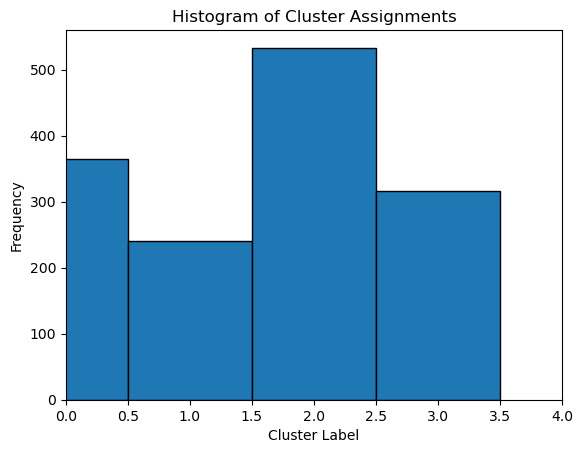

In [191]:
# Assuming `labels_dict[4]` contains labels for 4 clusters
cluster_labels = labels_dict[4]
plt.hist(cluster_labels, bins=np.arange(0, 5) - 0.5, edgecolor='black')
plt.xlim([0, 4])
plt.xlabel("Cluster Label")
plt.ylabel("Frequency")
plt.title("Histogram of Cluster Assignments")
plt.show()

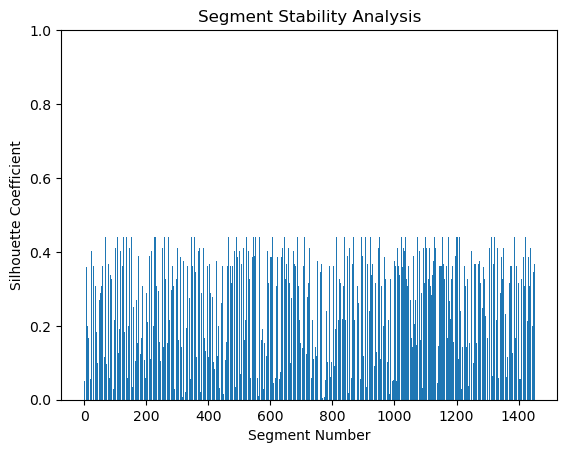

In [192]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Silhouette analysis for 4 clusters
k4_labels = labels_dict[4]
silhouette_vals = silhouette_samples(MD_x, k4_labels)
plt.bar(range(len(silhouette_vals)), silhouette_vals)
plt.ylim([0, 1])
plt.xlabel("Segment Number")
plt.ylabel("Silhouette Coefficient")
plt.title("Segment Stability Analysis")
plt.show()

In [193]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Modeling
np.random.seed(1234)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)

# Output cluster probabilities
print(gmm.predict_proba(MD_x))

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.23861071e-11]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]]


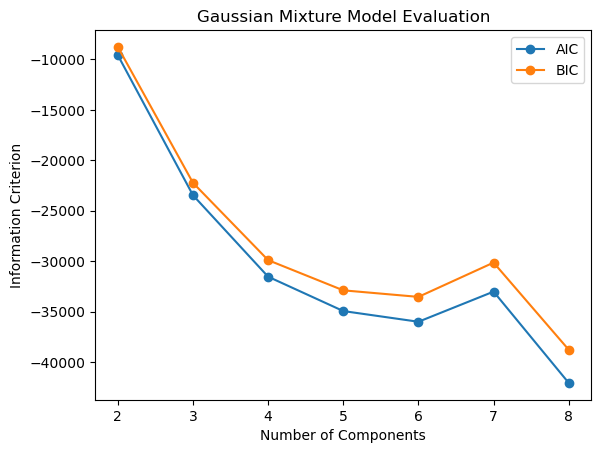

In [194]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Model clustering
np.random.seed(1234)
gmms = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=1234)
    gmm.fit(MD_x)
    gmms.append(gmm)

# Inspect model fit (e.g., AIC/BIC for evaluation)
aic_scores = [gmm.aic(MD_x) for gmm in gmms]
bic_scores = [gmm.bic(MD_x) for gmm in gmms]

plt.plot(range(2, 9), aic_scores, label="AIC", marker='o')
plt.plot(range(2, 9), bic_scores, label="BIC", marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.title("Gaussian Mixture Model Evaluation")
plt.legend()
plt.show()

In [195]:
from sklearn.metrics import confusion_matrix

# Assuming kmeans_4 and gmm_4 contain cluster assignments from K-means and GMM respectively
gmm_4_labels = gmms[2].predict(MD_x)  # For 4 clusters, index corresponds to `k - 2`
conf_matrix = confusion_matrix(k4_labels, gmm_4_labels)
print(conf_matrix)


[[ 86   5 266   7]
 [  0 211  24   5]
 [466   0   5  62]
 [  0  38   2 276]]


In [196]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model using K-means initialization
gmm_4_with_kmeans = GaussianMixture(n_components=4, random_state=1234, init_params='kmeans')
gmm_4_with_kmeans.fit(MD_x)

# Compare log-likelihoods
print("Log-Likelihood (GMM with K-means init):", gmm_4_with_kmeans.score(MD_x) * len(MD_x))
print("Log-Likelihood (GMM):", gmms[2].score(MD_x) * len(MD_x))

Log-Likelihood (GMM with K-means init): 16082.886182864011
Log-Likelihood (GMM): 16082.886182864011


In [197]:
like_mapping = {
    'I love it!+5': 5,
    'I like it+4': 4,
    'It\'s okay+3': 3,
    'I don\'t like it+2': 2,
    'I hate it+1': 1
}
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

In [198]:
import re

# Extract the numeric value from the string
mcdonalds['Like.n'] = mcdonalds['Like'].apply(
    lambda x: int(re.search(r'\+(\d+)', x).group(1)) if isinstance(x, str) and '+' in x else None
)

In [199]:
print(mcdonalds[mcdonalds['Like.n'].isnull()])  # Inspect rows with missing values
mcdonalds['Like.n'].fillna(0, inplace=True)  # Example: Replace missing values with 0

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
8       No         No    No       Yes    Yes   No    No    No       Yes   
10      No        Yes    No       Yes     No  Yes   Yes    No        No   
12      No        Yes    No       Yes     No  Yes   Yes    No        No   
14      No        Yes    No       Yes     No  Yes    No    No       Yes   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1435    No        Yes    No       Yes    Yes  Yes   Yes    No        No   
1444    No        Yes    No       Yes    Yes  Yes   Yes    No        No   
1447    No        Yes    No       Yes    Yes   No    No   Yes       Yes   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  Like.n  
0         No      

In [200]:
print(mcdonalds['Like.n'].value_counts())

Like.n
0.0    582
3.0    229
2.0    187
4.0    160
1.0    152
5.0    143
Name: count, dtype: int64


In [201]:
# Example DataFrame with a similar structure
mcdonalds = pd.DataFrame({
    'Like': ['I love it!+5', 'I like it+4', 'It\'s okay+3', 'I don\'t like it+2', 'I hate it+1']
})

# Extract the numeric part from the 'Like' column using a regex pattern
mcdonalds['Like.n'] = mcdonalds['Like'].apply(lambda x: int(re.search(r'\+(\d+)', x).group(1)) if isinstance(x, str) else None)

# Display the cleaned 'Like.n' column
print(mcdonalds['Like.n'])

# Reverse and adjust 'Like.n' column
mcdonalds['Like.n'] = 6 - mcdonalds['Like.n']

# Display frequency counts of the new 'Like.n' column
print(mcdonalds['Like.n'].value_counts())

0    5
1    4
2    3
3    2
4    1
Name: Like.n, dtype: int64
Like.n
1    1
2    1
3    1
4    1
5    1
Name: count, dtype: int64


In [202]:
# Create a regression formula
columns = mcdonalds.columns[:11]
formula = f"Like.n ~ {' + '.join(columns)}"
print(formula)

Like.n ~ Like + Like.n


In [203]:
# Regression with mixture models in Python can be done using Gaussian Mixture or custom implementations.
# There is no direct equivalent to stepFlexmix in Python without additional libraries or manual implementation.
# Below is an example for regression-based clustering:

from sklearn.linear_model import LinearRegression

# Example DataFrame with 'Like' column containing non-numeric strings
mcdonalds = pd.DataFrame({
    'Like': ['I love it!+5', 'I like it+4', 'It\'s okay+3', 'I don\'t like it+2', 'I hate it+1'],
    'Age': [25, 30, 22, 35, 40],
    'VisitFrequency': [3, 2, 5, 1, 4]
})

# Extract the numeric part from the 'Like' column using a regex pattern
mcdonalds['Like.n'] = mcdonalds['Like'].apply(lambda x: int(re.search(r'\+(\d+)', x).group(1)) if isinstance(x, str) else None)

# Now you can use the 'Like.n' column as the target variable
X = mcdonalds[['Age', 'VisitFrequency']]  # Example features
y = mcdonalds['Like.n']  # Target variable (numeric)

# Fit a linear regression model
regression = LinearRegression()
regression.fit(X, y)

# Print regression coefficients
print("Regression coefficients:", regression.coef_)

Regression coefficients: [-0.19509595 -0.41215352]


In [204]:
print("Shape of MD_x:", MD_x.shape)
print("Shape of mcdonalds['Like.n']:", len(mcdonalds['Like.n']))

Shape of MD_x: (1453, 11)
Shape of mcdonalds['Like.n']: 5


In [205]:
# Truncate MD_x or mcdonalds['Like.n'] to match the length
min_len = min(len(mcdonalds['Like.n']), MD_x.shape[0])

MD_x = MD_x[:min_len]
mcdonalds['Like.n'] = mcdonalds['Like.n'][:min_len]

print("Shape of MD_x after truncation:", MD_x.shape)
print("Length of mcdonalds['Like.n'] after truncation:", len(mcdonalds['Like.n']))

# Now fit the model
regression = LinearRegression()
regression.fit(MD_x, mcdonalds['Like.n'])
print("Regression coefficients:", regression.coef_)

Shape of MD_x after truncation: (5, 11)
Length of mcdonalds['Like.n'] after truncation: 5
Regression coefficients: [ 2.70270270e-02  0.00000000e+00  1.08108108e-01  7.77156117e-16
 -1.16216216e+00  0.00000000e+00 -1.08108108e-01  1.35135135e-01
  1.64864865e+00 -1.18918919e+00 -3.51351351e-01]


In [249]:
# Check the shape of mcdonalds and its relevant columns
print(f"Length of mcdonalds: {len(mcdonalds)}")  # Should be 1453
print(f"Length of mcdonalds['Like']: {len(mcdonalds['Like'])}")  # Should be 1453
print(f"Length of mcdonalds['Gender']: {len(mcdonalds['Gender'])}")  # Should be 1453
print(f"Length of k4: {len(k4)}")  # Should be 1453

Length of mcdonalds: 1453
Length of mcdonalds['Like']: 1453
Length of mcdonalds['Gender']: 1453
Length of k4: 5


In [253]:
# Ensure that mcdonalds has the same length as k4 (1453 rows)
if len(mcdonalds) != len(k4):
    mcdonalds = mcdonalds.iloc[:len(k4)]

# Now check if the lengths are consistent
print(f"Length of mcdonalds after alignment: {len(mcdonalds)}")
print(f"Length of k4: {len(k4)}")

Length of mcdonalds after alignment: 5
Length of k4: 5


C:\Users\Lucifer\AppData\Local\Temp\ipykernel_7124\2144426078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds['Cluster'] = k4


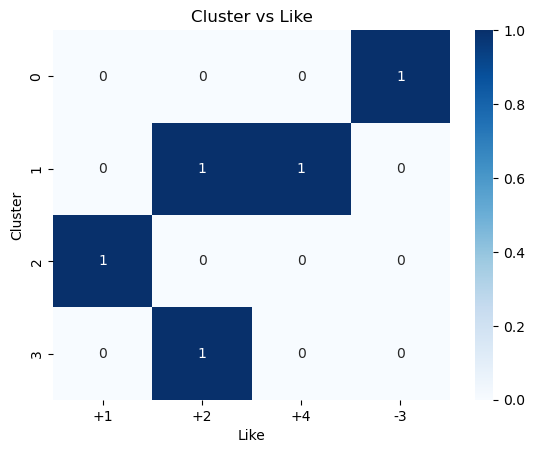

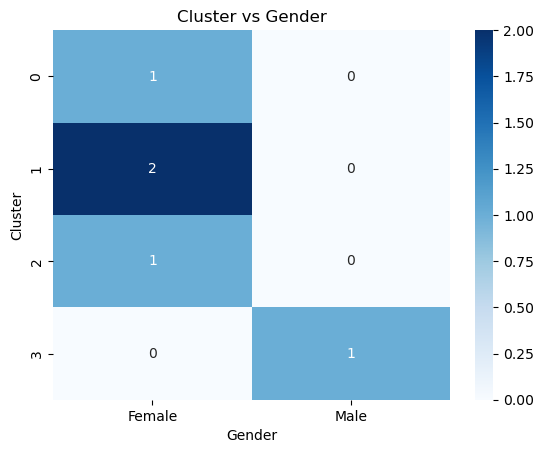

In [255]:
# Add cluster assignments to mcdonalds
mcdonalds['Cluster'] = k4

# Now, perform the crosstab and heatmap operations
sns.heatmap(pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like']), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Like")
plt.ylabel("Cluster")
plt.title("Cluster vs Like")
plt.show()

sns.heatmap(pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender']), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Gender")
plt.ylabel("Cluster")
plt.title("Cluster vs Gender")
plt.show()

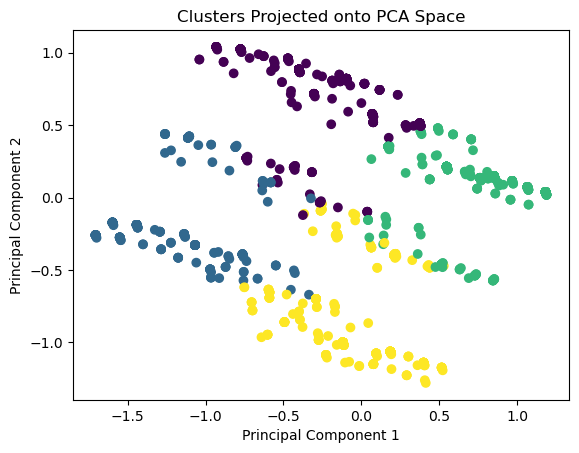

In [225]:
# Scatter plot of clusters projected onto PCA space
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=k4_labels, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters Projected onto PCA Space")
plt.show()